<a href="https://colab.research.google.com/github/Bappy60/ML_Assignment/blob/main/Final%20Lab%20Problem%202/Predicting_Customer_Behaviour_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Author Name : Md.Rafat Ahmed*

*Registration Number : 2018831028*

#Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter

import google.colab.drive as drive

#Mounting Drive & Downloading Zip file

In [2]:
drive.mount('/content/drive')
!unzip "/content/drive/My Drive/bank-data.zip"

Mounted at /content/drive
Archive:  /content/drive/My Drive/bank-data.zip
   creating: bank-data/
  inflating: __MACOSX/._bank-data    
  inflating: bank-data/.DS_Store     
  inflating: __MACOSX/bank-data/._.DS_Store  
  inflating: bank-data/bank-full.csv  
  inflating: __MACOSX/bank-data/._bank-full.csv  


In [3]:
!ls -l

total 16
drwx------ 2 root root 4096 Mar 11  2023 bank-data
drwx------ 5 root root 4096 Jan 19 18:51 drive
drwxr-xr-x 3 root root 4096 Jan 19 18:51 __MACOSX
drwxr-xr-x 1 root root 4096 Jan 18 14:21 sample_data


In [4]:
!ls -l bank-data/

total 4504
-rw-r--r-- 1 root root 4610348 Feb 14  2012 bank-full.csv


#Loading the Dataset

In [5]:
df = pd.read_csv('bank-data/bank-full.csv',sep=';')

#Exploaring Data

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
df.shape

(45211, 17)

In [9]:
#  Find missing values of each feature in the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# statistical aspects of the dataframe
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [11]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

#Preprocessing

Here are steps we follow to preprocess our data:

1. Dealing with missing values
2. Splitting of data (80 : 20 split)
3. Handling Categorical Variable
4. Oversampling using SMOTE
5. Random Feature Elimination (RFE)
Logistic Regression Model Fitting

##Dealing with missing values

In [12]:
#checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Luckily, our dataset does not contain missing data. Hence, we can skip this step.

##Splitting of data (80 : 20 split)

In [13]:
# load X and y
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (36168, 16)
Number transactions y_train dataset:  (36168,)
Number transactions X_test dataset:  (9043, 16)
Number transactions y_test dataset:  (9043,)


##Handling Categorical *variable*

In [14]:
cat_col = [n for n  in df.columns if df[n].dtypes == 'object']
for col in cat_col:
  print(col, '\n\n')
  print(df[col].value_counts())
  print("〰"*25)
  print('\n')

job 


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


marital 


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


education 


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


default 


no     44396
yes      815
Name: default, dtype: int64
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


housing 


yes    25130
no     20081
Name: housing, dtype: int64
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


loan 


no     37967
yes     7244
Name: loan, dtype: int64
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


contact 


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


month 


may

In [15]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_features = numeric_features[numeric_features != 'y']

category_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

print(numeric_features)
print(category_features)

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome']


In [16]:
def dummify(ohe, x, columns):
    transformed_array = ohe.transform(x)

    # list of category columns
    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names_out(category_features.tolist())

    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = numeric_features.tolist() + cat_colnames

    # convert numpy array to dataframe
    df = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)

    return transformed_array, df

In [17]:
# impute missing numerical values with a median value, then scale the values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# impute missing categorical values using the 'missing' and one hot encode the categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Each transformer is a three-element tuple that defines
#                                 the name of the transformer,
#                                 the transform to apply,
#                                 and the column features to apply it to
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)])

ohe = preprocessor.fit(X_train)

X_train_t = ohe.transform(X_train)
X_test_t = ohe.transform(X_test)

In [18]:
# transform training and test set and then convert it to dataframe
X_train_t_array, X_train_t = dummify(ohe, X_train, category_features)
X_test_t_array, X_test_t = dummify(ohe, X_test, category_features)

X_train_t.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3344,0.006515,-0.169381,-0.098218,-0.719756,-0.565886,-0.411364,-0.244772,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17965,0.759937,0.017848,1.703422,0.047138,-0.245389,-0.411364,-0.244772,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18299,0.100693,0.820681,1.823532,-0.493970,0.395606,-0.411364,-0.244772,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10221,-0.370196,-0.489588,-0.578656,0.459781,2.639088,-0.411364,-0.244772,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32192,1.419181,0.706889,-0.098218,0.027674,-0.245389,-0.411364,-0.244772,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
X_train_columns = X_train_t.columns
print(X_train_columns)
print(len(X_train_columns))

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
51


##Oversampling using SMOTE

Input values:    
* Dataframe: X_train_t, y_train, X_test_t, y_test
    
* Array: X_train_t_array, X_test_t_array

In [20]:
# Calculate the count of 'yes' and 'no' in the 'y' column
yes_count = (df['y'] == 'yes').sum()
no_count = (df['y'] == 'no').sum()

# Calculate the total count of values in the 'y' column
total_count = len(df)

# Calculate the percentage of 'yes' and 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("before sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)

before sampling
Percentage of 'yes' in 'y': 11.698480458295547
Percentage of 'no' in 'y': 88.30151954170445


As mentioned above, our data is imbalanced. We can see that in our dataset, the positive samples (minority class) are much less than negative samples (majority class). The positive samples (the people who subscribed to the term deposit) were only 11.69% from the total samples. Therefore, accuracy is no longer a good measure of performance because if we simply predict all examples to the negative class, we achieve 88.3% accuracy. As a result, we need to apply methods to overcome class imbalance problem. In this section, we use SMOTE method to balance our dataset.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

 We define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.


In [21]:
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train = oversample.fit_resample(X_train_t, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({'no': 31970, 'yes': 4198})
Counter({'no': 31970, 'yes': 31970})


## Random Feature Elimination (RFE)

RFE is a popular feature selection algorithm. It is easy to configure and pretty effective at selecting features in a training dataset. There are two important configuration options when using RFE:

    1. The number of features to select.
    
    2. The choice of algorithm used to help choose features.

In [22]:
from sklearn.svm import SVC

final_X_train = pd.DataFrame(data=X_train_smote,columns=X_train_columns )
final_y_train = pd.DataFrame(data=y_train,columns=['y'])

rfe_model = RFE(LogisticRegression(solver='lbfgs'), n_features_to_select=25)
rfe_model = rfe_model.fit(final_X_train, final_y_train)

# feature selection
print(rfe_model.support_)
print(rfe_model.ranking_)

[False False False  True False False False False False False  True False
  True False False  True False False  True False False False  True False
 False False False  True  True False False  True  True False  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True]
[25 27 22  1  5 24 23  9 14  3  1 16  1  7 20  1 26 13  1 19 18 10  1 21
  8 11 12  1  1  4  6  1  1  2  1 17  1  1  1  1  1 15  1  1  1  1  1  1
  1  1  1]


In [23]:
selected_columns = X_train_columns[rfe_model.support_]
print(selected_columns.tolist())

['duration', 'job_housemaid', 'job_retired', 'job_student', 'job_unknown', 'education_primary', 'default_yes', 'housing_no', 'loan_yes', 'contact_cellular', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [24]:
X_train_final = final_X_train[selected_columns.tolist()]
y_train_final = final_y_train['y']
X_test_final = X_test_t[selected_columns.tolist()]
y_test_final = y_test

X_test_final.head()

,duration,job_housemaid,job_retired,job_student,job_unknown,education_primary,default_yes,housing_no,loan_yes,contact_cellular,...,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3776,-0.252612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9928,-0.676934,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33409,-0.120255,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31885,0.210638,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15738,-0.529005,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Logistic Regression Model Fitting

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

In [26]:
y_pred = logreg.predict(X_test_final)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_final, y_test_final)))

Accuracy of logistic regression classifier on test set: 0.84


#Evaluation Metrics

Accuracy: 0.8433042132035828

Classification Report for Test Set:
              precision    recall  f1-score   support

          no       0.97      0.85      0.90      7952
         yes       0.42      0.82      0.56      1091

    accuracy                           0.84      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.84      0.86      9043


Confusion Matrix for Test Set:
[[6731 1221]
 [ 196  895]]


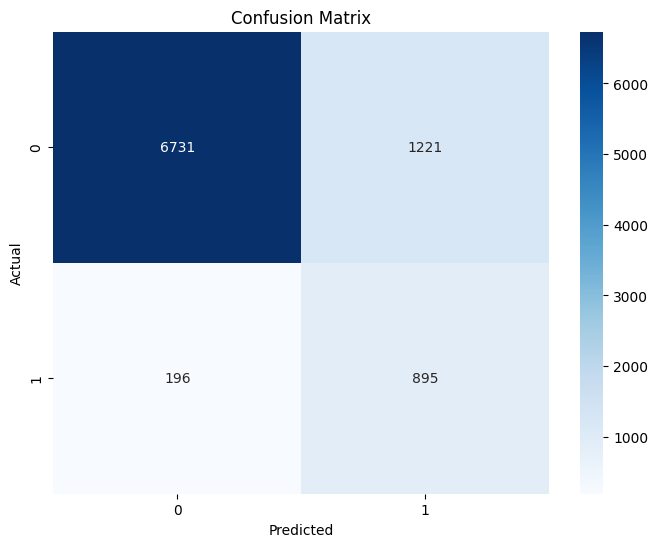

In [27]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test set
y_pred = logreg.predict(X_test_final)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
y_test

3776      no
9928      no
33409     no
31885     no
15738     no
        ... 
13353     no
38732    yes
5654      no
3779      no
11677     no
Name: y, Length: 9043, dtype: object

0.9040051491349563


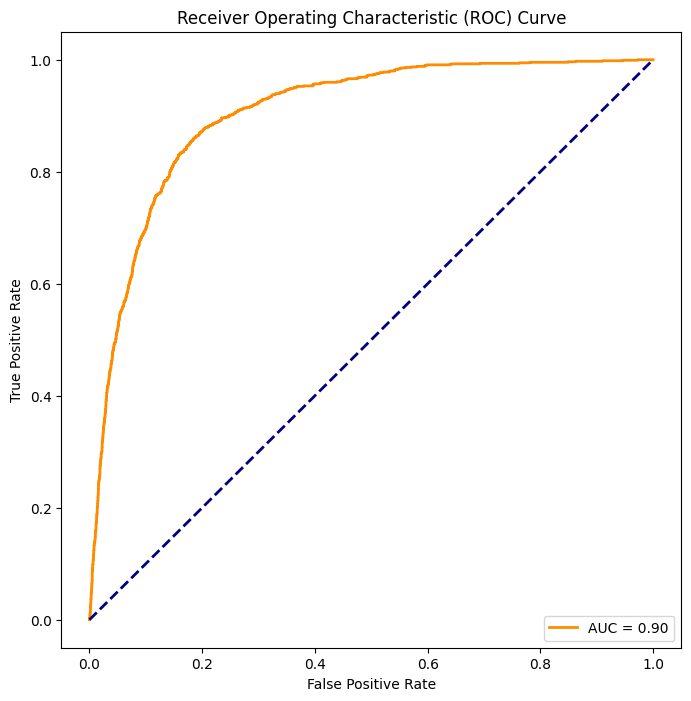

In [35]:
from sklearn.metrics import roc_curve, auc


y_scores = logreg.predict_proba(X_test_final)[:, 1]
y_test_encoded = LabelEncoder().fit_transform(y_test)

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_scores)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()